In [1]:
import torch
from torchvision import transforms
import json
from torchvision.utils import save_image

import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np


In [2]:
color_dict = {'0':(255,255,255),'1':(255,0,0),'2':(255,120,0),'3':(255,255,0),'4':(0,255,0),
'5':(0,0,255),'6':(120,120,120),'7':(50,50,120),'8':(50,120,120),'9':(100,50,50)}


In [5]:
with open("./dataset/train_aug_correct.json", "r") as json_file:
    train_json = json.load(json_file)

draw_dataset1 = []
draw_dataset2 = []

for i in range(4883):
    name_space = str(10000+i)
    dir=f'./dataset/train_aug/{name_space[1:]}.jpg'
    tmp_img = Image.open(dir)
    draw_dataset1.append(np.array(tmp_img))



    

In [6]:
for i in range(4883,9501):
    name_space = str(10000+i)
    dir=f'./dataset/train_aug/{name_space[1:]}.jpg'
    tmp_img = Image.open(dir)
    draw_dataset2.append(np.array(tmp_img))


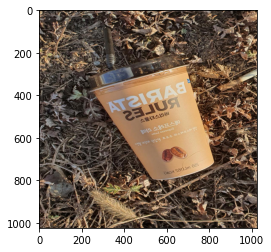

In [7]:
tmp_dataset = draw_dataset1.copy()+draw_dataset2.copy()
draw_dataset = tmp_dataset.copy()

plt.imshow(draw_dataset[4999])

In [8]:
for image_object in train_json['annotations']:
    id,lb,x1,y1,x2,y2 = image_object['image_id'],image_object['category_id'],image_object['bbox'][0],image_object['bbox'][1],image_object['bbox'][0]+image_object['bbox'][2],image_object['bbox'][1]+image_object['bbox'][3]
    lb = str(int(lb))
    draw_dataset[id] = cv2.rectangle(draw_dataset[id],
    (int(x1),int(y1)),
    (int(x2),int(y2)),
    color_dict[lb],3
    )



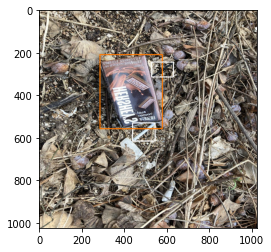

In [10]:
num=7578
test=draw_dataset[num]
plt.imshow(test)

In [12]:
import os
 
def createFolder(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
createFolder('./dataset/train_aug_box')

for i in range(9501):
    name_space = str(10000+i)
    im = Image.fromarray(draw_dataset[i])
    im.save(f'./dataset/train_aug_box/{name_space[1:]}.jpg')